## Multiclass Predictive Model
 - To build a predictive model to accurately identify the risk classification and eligibility of the applicants

## Motivation
- Life Insurance application process is old-fashioned
- Resulting in only 40% of U.S. households owning individual life insurance
- Prudential wants to make the entire process quicker and less labor intensive for the new and existing customers
- Build an predictive model that classifies the risk using an automated approach
- Thus, to improve the public perception of the insurance industry

## Dataset
- You will get your dataset from https://www.kaggle.com/c/prudential-life-insurance-assessment/data
    <img src='metadata.png' width="80%" style="float: center;">

## Data Preparation
- **Missing Values**
    - Replaced the missing values with the mean of the respective variable column
    - Removed variables which were insignificant(features which had less observation recorded eg. 200-500 /60000 records)
- **Treating Categorical Variables**
    - Created dummy variables for 60 categorical variables using OneHot Encoding
- **Variable Selection**
    - Performed backward, forward and stepwise selection
    - However, variable selection did not prove to be very effective
- **Dataset Splitting**
    - Randomly split the data into 60% training and 40% testing data samples

## Data Transformation
**Principal Component Analysis (PCA)**
- To transform the set of possibly correlated variables into a set of linearly uncorrelated values
- We selected the l value to be 30, explaining 97.9% of variance


## Random Forest

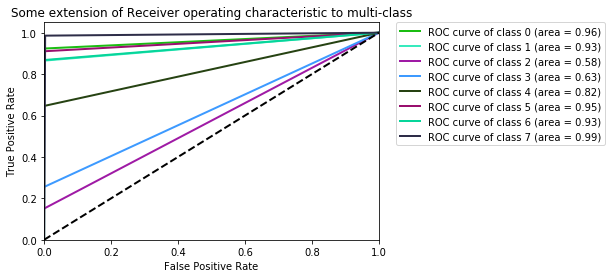

('Accuracy for Random Forest is = ', 0.8730265650654654)


In [80]:
import pylab 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
import random
from matplotlib.colors import ListedColormap


data = pd.read_csv("Insurance_Cleaned.csv", header=0, sep=',')
train, test = train_test_split(data, test_size = 0.4, train_size = 0.6, random_state=1)

#train data
train_label1 = train["Response"]
train_features = train.iloc[:, 1:247]

train_label = label_binarize(train_label1, classes=[1, 2, 3, 4, 5, 6, 7, 8])
n_classes = train_label.shape[1]

#test data
test_label = test["Response"]
test_features = test.iloc[:, 1:247]
test_label = label_binarize(test_label, classes=[1, 2, 3, 4, 5, 6, 7, 8])
n_classes = test_label.shape[1]

#Scaling the train data
train_scaled = StandardScaler(with_std=False).fit_transform(train_features)

#apply PCA
pca = PCA(n_components=30)

#Fit and transform train data
train_pca = pca.fit_transform(train_scaled)

#Model Random Forest
rfc = RandomForestClassifier(n_estimators=500, max_features = "sqrt")#, criterion="entropy")

rfc_fit = rfc.fit(train_pca, train_label)

#Scaling the test data
test_scaled = StandardScaler(with_std=False).fit_transform(test_features)

#Fit and transform test data
test_pca = pca.transform(test_scaled)

#predict test label
test_pred_class = rfc_fit.predict(test_pca)

#checking accuracy
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_roc_ = roc_curve(test_label[:, i], test_pred_class[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_label.ravel(), test_pred_class.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
lw=2

# Plot all ROC curves
plt.figure()

color = ["#%06x" % random.randint(0, 0xAAAAAA) for i in range(0, test_label.shape[1])]
for i, c in zip(range(n_classes), color):
    plt.plot(fpr[i], tpr[i], color=c, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
auc = metrics.accuracy_score(test_label,test_pred_class)
print("Accuracy for Random Forest is = ", auc)

**Parameter Fine Tuning**
- N_estimators (number of trees in the forest): 500
- Max_features (number of features to consider when looking for best split): int, float, **sqrt**, log2, none
- Criterion(Function to measure the quality of split): **gini**, entropy 


## K-Nearest Neighbor

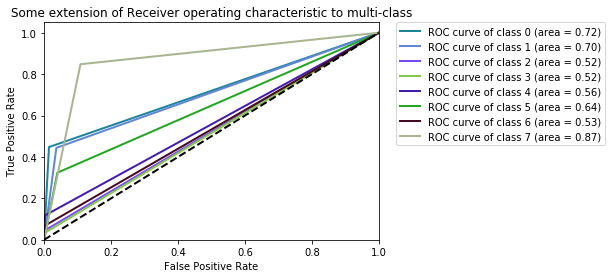

('Accuracy for KNN is = ', 0.4576685050309435)


In [74]:
import pylab 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
import random
from matplotlib.colors import ListedColormap


data = pd.read_csv("Insurance_Cleaned.csv", header=0, sep=',')
train, test = train_test_split(data, test_size = 0.4, train_size = 0.6, random_state=1)

#train data
train_label1 = train["Response"]
train_features = train.iloc[:, 1:247]
train_label = label_binarize(train_label1, classes=[1, 2, 3, 4, 5, 6, 7, 8])
n_classes = train_label.shape[1]

#test data
test_label = test["Response"]
test_features = test.iloc[:, 1:247]
test_label = label_binarize(test_label, classes=[1, 2, 3, 4, 5, 6, 7, 8])
n_classes = test_label.shape[1]

#Scaling the train data
train_scaled = StandardScaler(with_std=False).fit_transform(train_features)

#apply PCA
pca = PCA(n_components=30)

#Fit and transform train data
train_pca = pca.fit_transform(train_scaled)

#Model KNN
knn = KNeighborsClassifier(n_neighbors=13)

knn_fit = knn.fit(train_pca, train_label)

#Scaling the test data
test_scaled = StandardScaler(with_std=False).fit_transform(test_features)

#Fit and transform test data
test_pca = pca.transform(test_scaled)

#predict test label
test_pred_class = knn_fit.predict(test_pca)

#checking accuracy
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_roc_ = roc_curve(test_label[:, i], test_pred_class[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_label.ravel(), test_pred_class.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
lw=2

# Plot all ROC curves
plt.figure()

color = ["#%06x" % random.randint(0, 0xAAAAAA) for i in range(0, test_label.shape[1])]
for i, c in zip(range(n_classes), color):
    plt.plot(fpr[i], tpr[i], color=c, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
auc = metrics.accuracy_score(test_label,test_pred_class)
print("Accuracy for KNN is = ", auc)


**Parameter Fine Tuning (Default Setting)**
- N_neighbors(Number of neighbors): 13
- Wights(Weight function used in prediction): **uniform**, distance, [callable]
- Algorithm(Algorithm used to compute nearest neighbor): ball-tree, kd-tree, brute, **auto**
- Leaf_size: 30

## Logistic Regression

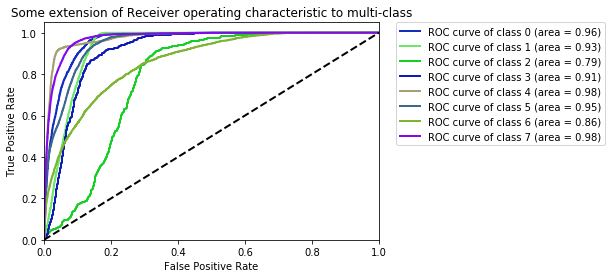

('Accuracy for Logistic Regression is = ', 0.620174293773418)


In [75]:
import pylab 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model as lm


data = pd.read_csv("Insurance_Cleaned.csv", header=0, sep=',')
train, test = train_test_split(data, test_size = 0.4, train_size = 0.6, random_state=1)

#train data
train_label = train["Response"]
train_features = train.iloc[:, 1:247]

#test data
test_label1 = test["Response"]
test_features = test.iloc[:, 1:247]
test_label = label_binarize(test_label1, classes=[1, 2, 3, 4, 5, 6, 7, 8])
n_classes = test_label.shape[1]

#Scaling the train data
train_scaled = StandardScaler(with_std=False).fit_transform(train_features)

#apply PCA
pca = PCA(n_components=30)

#Fit and transform test data
train_pca = pca.fit_transform(train_scaled)

#model logistic
LogR = lm.LogisticRegression(solver='lbfgs',multi_class='multinomial')

LogR_fit = LogR.fit(train_pca, train_label)


#Scaling the test data
test_scaled = StandardScaler(with_std=False).fit_transform(test_features)

#Fit and transform test data
test_pca = pca.transform(test_scaled)

#predict test label

test_pred_class = LogR_fit.predict_log_proba(test_pca)
test_pred_class1 = LogR_fit.predict(test_pca)


#checking accuracy
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_roc_ = roc_curve(test_label[:, i], test_pred_class[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_label.ravel(), test_pred_class.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])
lw=2

# Plot all ROC curves
plt.figure()

color = ["#%06x" % random.randint(0, 0xAAAAAA) for i in range(0, test_label.shape[1])]
for i, c in zip(range(n_classes), color):
    plt.plot(fpr[i], tpr[i], color=c, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#checking accuracy
auc = metrics.accuracy_score(test_label1,test_pred_class1)

print("Accuracy for Logistic Regression is = ", auc)

**Parameter Fine Tuning**
- Solver(Algorithm to use for optimization): newton-cg, **lbfgs**, liblinear, sag
- Multi-class(training algorithm scheme): ovr, **multinomial**

## Analysis
- Three Machine Learning Models are used to predict the risk class of the applicant.
    - Random Forest
    - K Nearest Neibhbor
    - Logistic Regression
- The graph above indicates individual class accuracy i.e. the ability of the model to predict whether an applicant belongs to that one class accurately.
- The graph indicates Random Forest to be the pick of the models out of the three.